In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('logs/collectedData.csv', index_col=False)

/tmp/ipykernel_16396/988754356.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('logs/collectedData.csv', index_col=False)


In [14]:
print(df.columns)

Index(['Strategy', 'Start', 'End', 'Distance Taveled', 'Elapsed Time',
       'Right Turns', 'Left Turns'],
      dtype='object')


In [19]:
df

,Strategy,Start,End,Distance Taveled,Elapsed Time,Right Turns,Left Turns
0,bfs,454.103816:270.000000:-228.623000,330.000000:270.000000:-228.623000,612.159546,20.405318,8,5
1,dijkstra,454.103816:270.000000:-228.623000,310.000000:270.000000:-228.623000,616.959546,20.565318,11,3
2,astar,454.103816:270.000000:-228.623000,300.000000:270.000000:-228.623000,695.859546,23.195318,10,4
3,bfs,331.858557:271.209684:-225.286880,224.000000:270.000000:147.000000,765.300000,25.510000,7,4
4,dfs,454.103816:270.000000:-228.623000,320.000000:270.000000:-228.623000,1479.340492,49.311350,27,28
5,dijkstra,313.132926:274.340454:-226.260236,-30.000000:270.000000:-707.000000,1108.980946,36.966032,8,6
6,astar,296.759601:274.265385:-228.105299,1333.000000:270.000000:423.000000,1710.564434,57.018814,2,22
7,bfs,225.399151:274.200000:143.389679,-223.000000:270.000000:-229.000000,1115.064434,37.168814,12,8
8,dijkstra,-26.475480:274.200000:-708.178999,-581.000000:270.000000:296.000000,1940.783488,64.692783,24,22
9,astar,1329.242553:274.200000:421.989658,1261.000000:270.000000:-669.000000,1761.300000,58.710000,12,12


In [15]:
df['Start'] = df[' Start Coordinates'].str.split(':')
df[' End Coordinates'].info()
# df['End'] = df[' End Coordinates'].str.split(':')

<class 'pandas.core.series.Series'>
Index: 840 entries, bfs to dfs
Series name:  End Coordinates
Non-Null Count  Dtype  
--------------  -----  
840 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [12]:
df['End'][0]

612.159546

In [41]:
print("Elapsed time:")
for strat in df["Strategy"].unique():
    print('\n' + strat) 
    print(df[df['Strategy'] == strat]['Elapsed Time'].describe())

Elapsed time:

astar
count     82.000000
mean       8.671335
std       45.825271
min        0.003604
25%        0.034787
50%        0.056231
75%        0.075705
max      333.561518
Name: Elapsed Time, dtype: float64

bfs
count     84.000000
mean       8.501719
std       45.328465
min        0.004946
25%        0.027631
50%        0.050131
75%        0.076986
max      333.922810
Name: Elapsed Time, dtype: float64

dijkstra
count     85.000000
mean       8.401794
std       44.952722
min        0.006355
25%        0.023344
50%        0.036501
75%        0.057280
max      332.650250
Name: Elapsed Time, dtype: float64

dfs
count      9.000000
mean      78.092019
std      125.169776
min        0.195213
25%        0.405616
50%        0.649028
75%      156.632440
max      335.339618
Name: Elapsed Time, dtype: float64


In [42]:
df['x'] = df['End'].apply(lambda x: x[0])
df['y'] = df['End'].apply(lambda x: x[2])

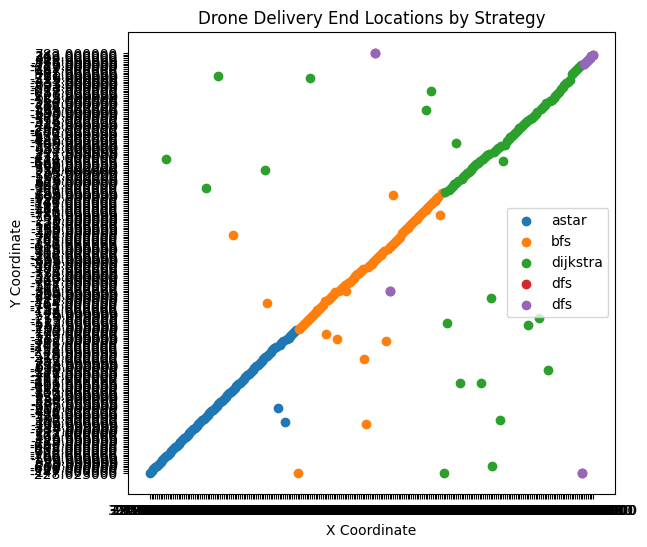

In [60]:
plt.figure(figsize=(10, 6))
for strat in df['Strategy'].unique():
    subset = df[df['Strategy'] == strat]
    plt.scatter(subset['x'], subset['y'], label=strat)

# subset = df[['Strategy'] == strat]
plt.scatter(subset['x'], subset['y'], label=strat)
plt.title('Drone Delivery End Locations by Strategy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
# plt.xlim(-1400, 1500)
# plt.ylim(-800, 800)
plt.gca().set_aspect(1600/1600)
plt.show()

In [47]:
subset

,Strategy,Start Coordinates,End Coordinates,Elapsed Time,Start,End,x,y
0,astar,454.189095:270.000000:-228.623000,300.000000:270.000000:-228.623000,207.888384,"[454.189095, 270.000000, -228.623000]","[300.000000, 270.000000, -228.623000]",300.000000,-228.623000
3,astar,296.239187:269.100000:-228.022238,224.000000:270.000000:147.000000,0.038976,"[296.239187, 269.100000, -228.022238]","[224.000000, 270.000000, 147.000000]",224.000000,147.000000
6,astar,225.395740:269.100000:143.397655,-223.000000:270.000000:-229.000000,0.035008,"[225.395740, 269.100000, 143.397655]","[-223.000000, 270.000000, -229.000000]",-223.000000,-229.000000
9,astar,-220.837045:269.100000:-232.005702,1261.000000:270.000000:-669.000000,0.054777,"[-220.837045, 269.100000, -232.005702]","[1261.000000, 270.000000, -669.000000]",1261.000000,-669.000000
14,astar,1257.621718:269.100000:-667.052257,-277.000000:270.000000:668.000000,8.868406,"[1257.621718, 269.100000, -667.052257]","[-277.000000, 270.000000, 668.000000]",-277.000000,668.000000
...,...,...,...,...,...,...,...,...
249,astar,-658.640341:269.100000:-370.333130,-951.000000:270.000000:267.000000,0.037181,"[-658.640341, 269.100000, -370.333130]","[-951.000000, 270.000000, 267.000000]",-951.000000,267.000000
251,astar,-953.056884:269.100000:263.805550,-551.000000:270.000000:-112.000000,0.047525,"[-953.056884, 269.100000, 263.805550]","[-551.000000, 270.000000, -112.000000]",-551.000000,-112.000000
254,astar,-550.933809:269.100000:-111.808237,1172.000000:270.000000:-93.000000,2.292432,"[-550.933809, 269.100000, -111.808237]","[1172.000000, 270.000000, -93.000000]",1172.000000,-93.000000
256,astar,1172.693186:269.100000:-96.856383,1067.000000:270.000000:170.000000,1.530502,"[1172.693186, 269.100000, -96.856383]","[1067.000000, 270.000000, 170.000000]",1067.000000,170.000000
